# Decision Trees in scikit-learn
Using the `DecisionTreeClassifier` in scikit-learn.  

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
apears = pd.read_csv('ApplesPears.csv')
apears.head()

,Greeness,Height,Width,Taste,Weight,H/W,Class
0,210,60,62,Sweet,186,0.97,Apple
1,220,70,53,Sweet,180,1.32,Pear
2,215,55,50,Tart,152,1.10,Apple
3,180,76,40,Sweet,152,1.90,Pear
4,220,68,45,Sweet,153,1.51,Pear


scikit-learn can deal with a category class label but it cannot deal with category features.  
So we drop the `Taste` feature. 

In [3]:
y = apears.pop('Class').values
apears.pop('Taste')    # Can't deal with category features
ap_features = apears.columns
X = apears.values
X[0]

array([210.  ,  60.  ,  62.  , 186.  ,   0.97])

In [4]:
y

array(['Apple', 'Pear', 'Apple', 'Pear', 'Pear', 'Apple', 'Pear', 'Apple',
       'Apple', 'Apple'], dtype=object)

In [5]:
ftree = DecisionTreeClassifier(criterion='entropy')
ap_tree = ftree.fit(X, y)

In [6]:
ap_tree.predict([X[2]])

array(['Apple'], dtype=object)

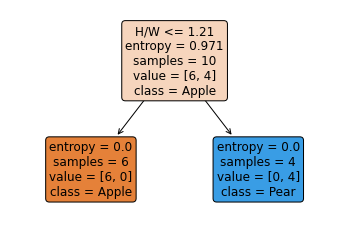

In [7]:
tree.plot_tree(ap_tree, feature_names=ap_features, fontsize = 12,
                      class_names=['Apple','Pear'],  
                      filled=True, rounded=True) 
None # supressing the verbose return from plot_tree

In [8]:
apears.pop('H/W')    # Delete this feature to make it harder
X = apears.values
ap_features = apears.columns

In [9]:
ap2_tree = ftree.fit(X, y)

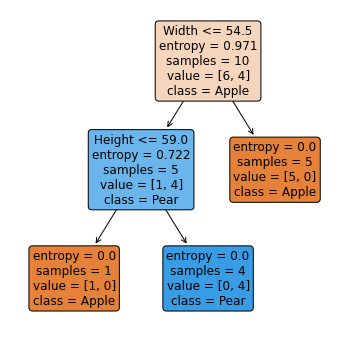

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
tree.plot_tree(ap2_tree,feature_names=ap_features, fontsize = 12,
                      class_names=['Apple','Pear'],  
                      filled=True, rounded=True) 
None # supressing the verbose return from plot_tree

---
## Penguins Data
For more information on the Penguins dataset see:
https://allisonhorst.github.io/palmerpenguins/ 

Changing the `min_samples_leaf` and `min_impurity_decrease` attributes will change the *bushiness* of the tree. 
Two key methods:
1. `fit` method will train the tree from the data.
2. `predict` method will produce class predictions for an array of test data. 

In [11]:
penguins_all = pd.read_csv('penguins_af.csv')
f_names = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']
X = penguins_all[f_names].values
y = penguins_all['species']
species_names = np.unique(y)
species_names

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [12]:
X.shape

(333, 4)

In [13]:
ptree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=30, 
                               min_impurity_decrease = 0.1)
ptree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.1,
                       min_samples_leaf=30)

## ptree # Have a look at the model attributes

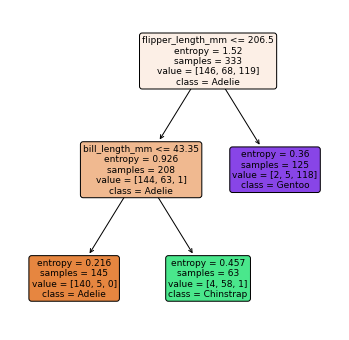

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
tree.plot_tree(ptree, feature_names=f_names,  
                      class_names=species_names, fontsize = 9,
                      filled=True, rounded=True) 
None # supressing the verbose return from plot_tree

Run a test example.

In [15]:
tn = 15
for i,j in zip(X[tn],f_names):
    print(i,j)
y_pred = ptree.predict([X[tn]])
print('Prediced class label:',y_pred[0])

37.8 bill_length_mm
18.3 bill_depth_mm
174.0 flipper_length_mm
3400.0 body_mass_g
Prediced class label: Adelie


***
   ## Athlete Data

In [16]:
import pandas as pd
athlete = pd.read_csv('AthleteSelection.csv',index_col = 'Athlete')
athlete.head()

,Speed,Agility,Selected
Athlete,,,
x1,2.50,6.00,No
x2,3.75,8.00,No
x3,2.25,5.50,No
x4,3.25,8.25,No
x5,2.75,7.50,No


In [17]:
y = athlete.pop('Selected').values
X = athlete.values

In [18]:
atree = DecisionTreeClassifier(criterion='entropy')
atree = atree.fit(X,y)

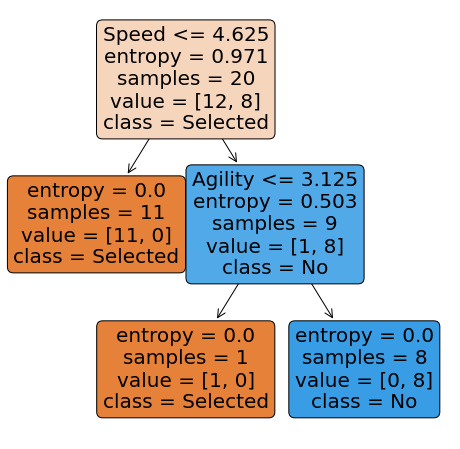

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
tree.plot_tree(atree, feature_names=['Speed','Agility'],  
                      class_names=['Selected','No'],  
                      filled=True, rounded=True,)
None # supressing the verbose return from plot_tree

## Restaurant Data
Predictive features are categories(rather than numeric).

In [20]:
import pandas as pd
restaurant = pd.read_csv('restaurant.csv',index_col = 'No')
restaurant.head()

,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEst,WillWait?
No,,,,,,,,,,,
1,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
2,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
3,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
4,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
5,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


## Aside: Dealing with category data
Convert to numeric - two options:  
1. `get_dummies` method for pandas.
2. `OneHotEncoding` for sklearn. 

In [21]:
df = pd.DataFrame({'Pet': ['cat', 'dog', 'cat','ferret'], 
                   'Transport': ['bike', 'car', 'car','bike'],
                   'Gender': ['Female','Female','Male','Female']})
df

,Pet,Transport,Gender
0,cat,bike,Female
1,dog,car,Female
2,cat,car,Male
3,ferret,bike,Female


### Pandas `get_dummies`
The Pandas `get_dummies` method is the easiest way to do One-Hot encoding.  
But if you want to apply the encoding to a test file later, this gets awkward. 

In [22]:
pd.get_dummies(df)

,Pet_cat,Pet_dog,Pet_ferret,Transport_bike,Transport_car,Gender_Female,Gender_Male
0,1,0,0,1,0,1,0
1,0,1,0,0,1,1,0
2,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0


In [23]:
pd.get_dummies(df,drop_first=True)

,Pet_dog,Pet_ferret,Transport_car,Gender_Male
0,0,0,0,0
1,1,0,1,0
2,0,0,1,1
3,0,1,0,0


### Using `OneHotEncoder` to convert category features to numbers

In [24]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
onehot_encoder = OneHotEncoder(sparse=False)
dfOH = onehot_encoder.fit_transform(df)
dfOH

array([[1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 1., 0.]])

In [25]:
onehot_encoder.get_feature_names_out()

array(['Pet_cat', 'Pet_dog', 'Pet_ferret', 'Transport_bike',
       'Transport_car', 'Gender_Female', 'Gender_Male'], dtype=object)

In [ ]:
onehot_encoder.categories_

### `LabelEncoder` also converts category features to numbers
This is more compact.  
But it is not exactly what we want as the numbers are misleading.  
Ferrets are not more like dogs than cats. (Well maybe they are!)

In [ ]:
# LabelEncoder only works on single columns so we must 'apply' it to the dataframe. 
label_encoder = LabelEncoder()
labelE = df.apply(label_encoder.fit_transform)
labelE

---
# Restaurant Data 
## Using OneHotEncoding
`OneHotEncoder` class has two key methods:   
1. `fit` to 'learn' the transform from the data,
2. `transform` to apply the OneHot transform to the data, the transform can be applied to other (e.g. test) datasets.


In [ ]:
restaurant = pd.read_csv('restaurant.csv',index_col = 'No')
y = restaurant.pop('WillWait?').values
X = restaurant.values
X[:3,]

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)  # We can add drop='first'
restOH = onehot_encoder.fit(restaurant)
restOH_data = restOH.transform(restaurant)

In [ ]:
restaurant.columns

In [ ]:
restOH.get_feature_names_out(restaurant.columns)

In [ ]:
rtree = DecisionTreeClassifier(criterion='entropy')
rtreeOH = rtree.fit(restOH_data,y)
fig, ax = plt.subplots(figsize=(9, 9))
tree.plot_tree(rtreeOH, feature_names=restOH.get_feature_names_out(restaurant.columns),
                      class_names=['Yes','No'], fontsize = 10, 
                      filled=True, rounded=True)
None # supressing the verbose return from plot_tree

---
<h1><span style="color:red">Bonus Material</span></h1>



## Encoding Restaurant data using `get_dummies`

In [ ]:
rest1 = pd.get_dummies(restaurant,drop_first=False)
rest2 = pd.get_dummies(restaurant,drop_first=True)

In [ ]:
rest1.head()

In [ ]:
rest2.head()

In [ ]:
X = rest1.values

In [ ]:
rtree1 = DecisionTreeClassifier(criterion='entropy')
rtree1.fit(rest1,y) # fit method can be called directly on the data frame
rtree1.fit(X,y)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
tree.plot_tree(rtree1, feature_names=rest1.columns,
                      class_names=['Yes','No'], fontsize = 9,
                      filled=True, rounded=True)
None # supressing the verbose return from plot_tree

In [ ]:
rtree2 = DecisionTreeClassifier(criterion='entropy')
X2 = rest2.values
rtree2.fit(X2,y)
fig, ax = plt.subplots(figsize=(8, 8))
tree.plot_tree(rtree2, feature_names=rest2.columns,
                      class_names=['Yes','No'], fontsize = 9,
                      filled=True, rounded=True)
None # supressing the verbose return from plot_tree